In [1]:
import matplotlib.pylab as plt
import numpy as np
import time
import os
from numba import jit, njit, prange

In [2]:
def set_pos():
    xmin = 0.0
    xmax = 10.0
    nx = 500
    gamma = 1
    x = np.linspace(xmin, xmax, nx)
    dx = (xmax-xmin)/nx
    return nx, gamma, x, dx

nx, gamma, x, dx = set_pos()

In [3]:
def set_time():
    tmin = 0.0
    tmax = 10.0
    nt = 1000000
    tgrid = np.linspace(tmin, tmax, nt)
    dt = (tmax-tmin)/nt
    return nt, tgrid, dt

nt, tgrid, dt = set_time()

In [4]:
def velocity():
    v = np.zeros(nx)
    dvdt = np.zeros(nx)
    return v, dvdt

v, dvdt = velocity()

In [5]:
y = np.zeros(nx)
y = np.exp(-(np.array(x)-5.0)**2)

ddx = dx*dx

start_1 = time.time()
for t in range(len(tgrid)):
    dvdt[1:-2] = gamma*(y[:-3]-2*y[1:-2]+y[2:-1])/ddx  
    y += v*dt
    v += dvdt*dt
end_1 = time.time()
time_1 = end_1 - start_1
print("Seconds elapsed = %s" % (time_1))

user_time, sys_time, _, _, _ = os.times()

print("User time: {:.3f} seconds".format(user_time))
print("System time: {:.3f} seconds".format(sys_time))

Seconds elapsed = 13.019402980804443
User time: 13.510 seconds
System time: 1.350 seconds


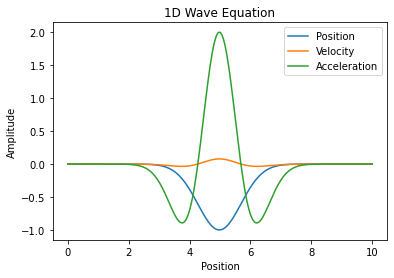

In [6]:
plt.plot(x, y, label = "Position")
plt.plot(x, v, label = "Velocity")
plt.plot(x, dvdt, label = "Acceleration")
plt.title('1D Wave Equation')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.legend()

In [7]:
@njit(parallel=True)
def fast_pos():
    xmin = 0.0
    xmax = 10.0
    nx = 500
    gamma = 1
    x = np.linspace(xmin, xmax, nx)
    dx = (xmax-xmin)/nx
    return nx, gamma, x, dx
nx, gamma, x, dx = fast_pos()

In [8]:
@njit(parallel=True)
def fast_time():
    tmin = 0.0
    tmax = 10.0
    nt = 1000000
    tgrid = np.linspace(tmin, tmax, nt)
    dt = (tmax-tmin)/nt
    return nt, tgrid, dt

nt, tgrid, dt = fast_time()

In [9]:
@njit(parallel=True)
def fast_velocity():
    v = np.zeros(nx)
    dvdt = np.zeros(nx)
    return v, dvdt

v, dvdt = fast_velocity()

In [10]:
@njit(parallel=True)
def fast_numerical_sol():
    nx, gamma, x, dx = fast_pos()
    nt, tgrid, dt = fast_time()
    v, dvdt = fast_velocity()
    y = np.zeros(nx)
    y = -(x-5.0)**2
    y = np.exp(y)
    ddx = dx*dx
    for t in prange(len(tgrid)):
        dvdt[1:-2] = gamma*(y[:-3]-2*y[1:-2]+y[2:-1])/ddx  
        y += v*dt
        v += dvdt*dt
    return y, v, dvdt

In [11]:
start_2 = time.time()
fast_numerical_sol()
end_2 = time.time()
time_2 = end_2 - start_2
print("Seconds elapsed (with compilation) = %s" % (time_2))

start_3 = time.time()
fast_numerical_sol()
end_3 = time.time()
time_3 = end_3 - start_3
print("Seconds elapsed (after compilation) = %s" % (time_3))

Seconds elapsed (with compilation) = 95.30770111083984
Seconds elapsed (after compilation) = 1.7867751121520996


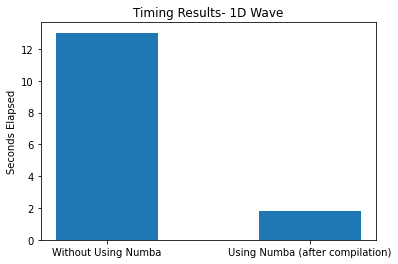

In [12]:
x = 'Without Using Numba', 'Using Numba (after compilation)'
times = time_1, time_3
y = times
plt.bar(x, y, width = 0.5)
plt.ylabel('Seconds Elapsed')
plt.title('Timing Results- 1D Wave')
plt.show()